In [6]:
using Revise
using Plots
using Arpack
plotly(fmt=:png)
includet("lennardjones.jl")
includet("sparseboxes.jl")

# Simulation

In [390]:
#method = :voronoi
method = :sb
@time r=namedtuple(run(npicks=300, nsteps=2_00, ncells=6, method=method, prune=Inf, sigma=0.5, x0=x0gen));

length(picks) = 14
  0.000463 seconds (1.25 k allocations: 133.828 KiB)
  0.000015 seconds (53 allocations: 9.031 KiB)
sparsity: 14/46656=0.00030006858710562417
pruned 0 large outbound rates
pruned 0 states without incoming rates
solving committor...
  0.269343 seconds (633.65 k allocations: 35.703 MiB, 85.58% compilation time)


In [394]:
sparseboxpick(r.x, 6, ones(size(r.x,2)), )[1]

length(picks) = 14


14×14 SparseMatrixCSC{Float64, Int64} with 32 stored entries:
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅   1.0   ⋅    ⋅   1.0
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0  1.0   ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0   ⋅    ⋅   1.0  1.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅   1.0
 1.0   ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅

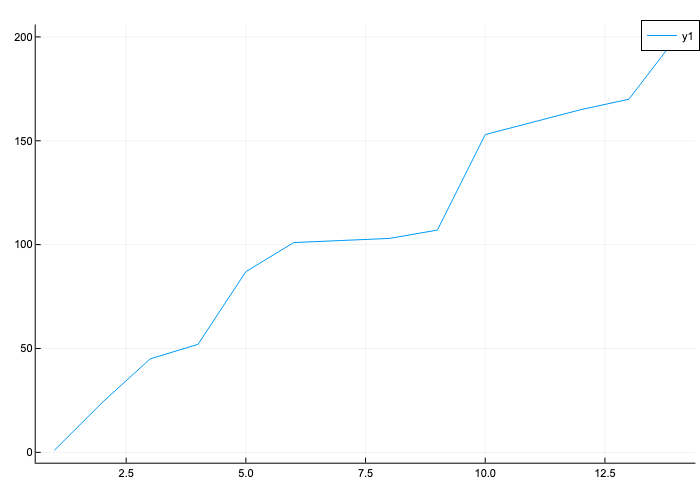

length(picks) = 14
 0.4706198736049483 % verbesserung pro prozent 


In [397]:
_, _, order = sparseboxpick(r.x, 6, ones(size(r.x,2)), r.boundary)
plot(order) |> display
accel =  (order[end]-order[end-10]) / 10
println(" $(length(order)/size(r.x, 2)  / accel * 100) % verbesserung pro prozent ")

In [334]:
r.pinds

9559-element Vector{Bool}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

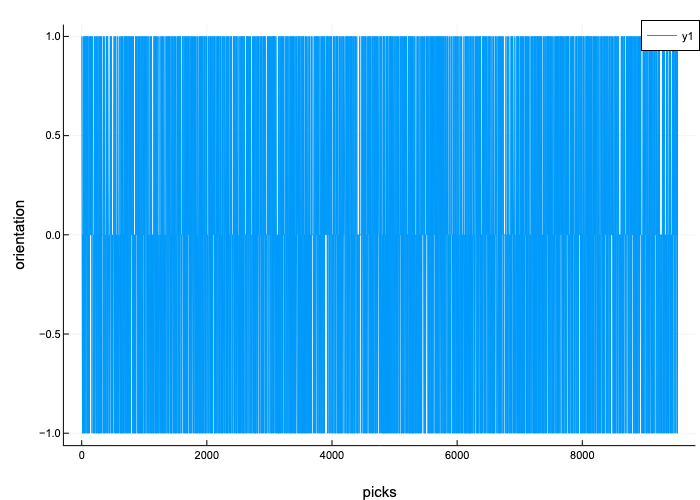

  0.160396 seconds (107.85 k allocations: 8.908 MiB)


In [333]:
@time plot(r.classes, ylabel="orientation", xlabel="picks")|>display;

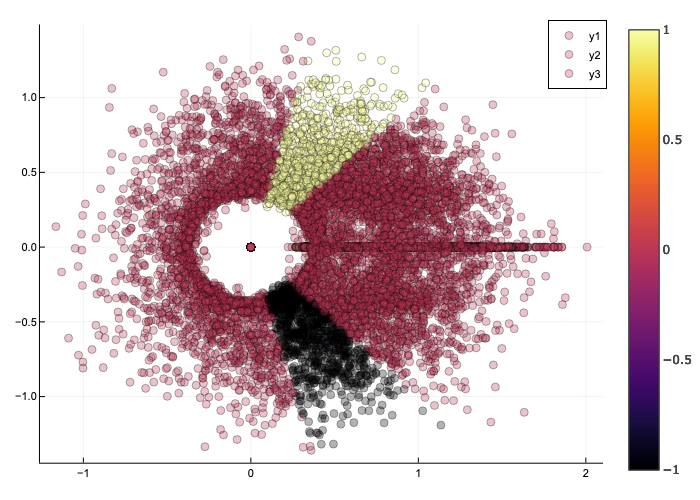

 60.457629 seconds (8.08 M allocations: 711.257 MiB, 1.08% gc time, 0.63% compilation time)


In [323]:
plot()
@time plot_trajectories(normalform(r.picks), alpha=0.3, marker_z=r.classes) |> display;
#plot_trajectories(normalform(r.x[:,1:100:end]), alpha=0.1, markersize=0.5)

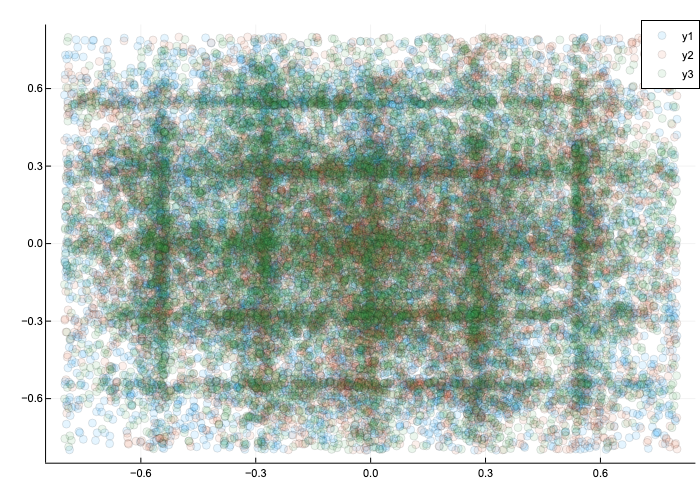

  3.480937 seconds (187.72 k allocations: 34.484 MiB)


In [328]:
plot();
@time plot_trajectories(r.picks, alpha=0.1) |> display;
#plot_trajectories(r.x[:,1:end], alpha=0.01, markersize=0.5)

# Generator preprocessing

In [329]:
cutoff = 3
prune = Inf

Q, pinds = prune_Q(r.Q,Inf)

Q.nzval[Q.nzval.>cutoff] .= cutoff
Q = fixdiagonal(Q)

pruned 0 large outbound rates
pruned 0 states without incoming rates


9246×9246 SparseMatrixCSC{Float64, Int64} with 54100 stored entries:
⢿⣷⣷⣿⣶⣾⣿⣿⣿⣿⣿⣿⣷⣝⣾⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣷⣟⣾⣿⣿
⣽⣿⣿⣿⣿⣿⣯⣯⣿⣿⣿⣿⣿⣿⣿⣿⣽⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿
⣿⣿⡯⣿⣿⣿⣿⣿⣻⣿⣿⣛⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣷⣿⢻⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣝⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯
⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣽⣟⢻⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢿⣿⣷⣟⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⢿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣻⢿⣿⣿⣿⣿⢿⣿⣿⣿⣟
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⢿⣿⣟⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⡿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣾⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⢿⣿⣷
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⢿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⢿⣷⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢽⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿
⣻⣽⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣟⣿⣿⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿

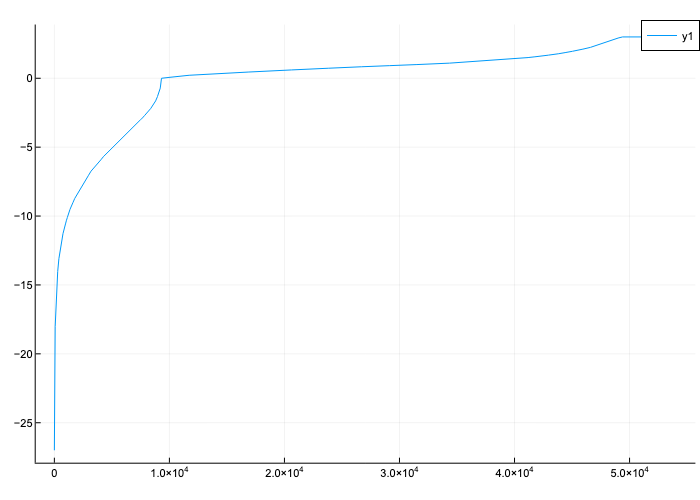

In [330]:
plot((Q.nzval|>sort))

# Committor convergence

In [331]:
solve_committor(Q, r.classes[pinds])

LoadError: SingularException(0)

# Spectrum

In [215]:
@time evals, evecs = eigs(Q, which=:LR, maxiter=10000, tol=10)

  0.088440 seconds (221 allocations: 23.700 MiB, 43.86% gc time)


(ComplexF64[-1.4370822389400493 + 0.0im, -8.841887985719467 + 0.0im, -25.56442017752977 + 0.0im, -54.534339501182835 + 0.0im, -95.42083185024386 + 0.0im, -144.6943893897001 + 0.0im], ComplexF64[0.0007461108854100831 + 0.0im -0.006969407872424066 + 0.0im … -0.0015864053922260827 + 0.0im -0.001187431927206609 + 0.0im; 0.0015314139302951607 + 0.0im -0.00341610703495228 + 0.0im … -0.0323935883743494 + 0.0im 0.011248261442494535 + 0.0im; … ; 0.005733714018910372 + 0.0im 0.00031837650131911577 + 0.0im … 0.05105800208371236 + 0.0im 0.012056228961438651 + 0.0im; -0.00548221200100888 + 0.0im 0.0006695529127005116 + 0.0im … 0.002624913164287968 + 0.0im 0.0033158572582114164 + 0.0im], 6, 1, 20, [-0.6661974711242541, 1.5733775734598185, 0.18228891481089837, -0.4441066366376615, -0.013071801682713217, -5.351018825905083, -0.18324014878169465, -0.02499662970482211, -1.5780205905101707, -0.0663013699310205  …  -0.18683560103805386, 1.669890954358311, 1.9015450776373892, 0.025243166236312623, -0.21210

In [216]:
evals

6-element Vector{ComplexF64}:
 -1.4370822389400493 + 0.0im
  -8.841887985719467 + 0.0im
  -25.56442017752977 + 0.0im
 -54.534339501182835 + 0.0im
  -95.42083185024386 + 0.0im
  -144.6943893897001 + 0.0im

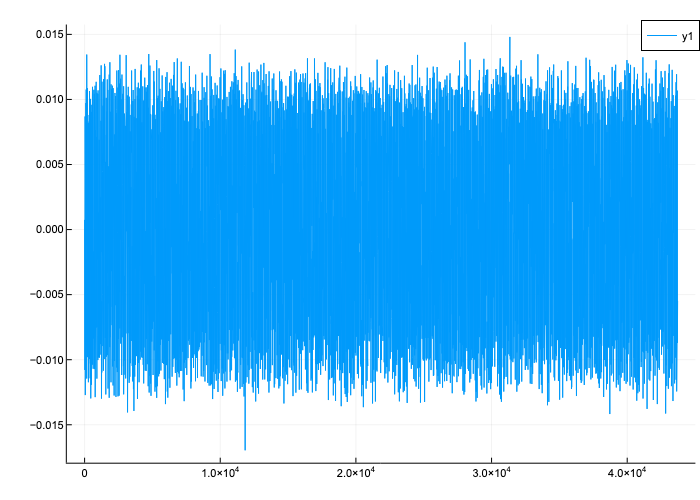

In [219]:
plot(evecs[:,1].|>real)
#plot!(r.classes, alpha=0.5)

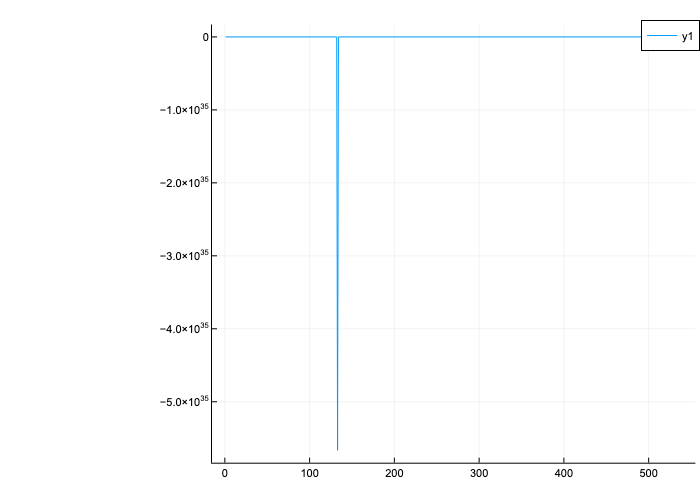

In [19]:
plot(diag(r.Q))

# Cell analysis

In [225]:
prob = argmin(diag(r.Q))

20569

In [226]:
@show r.Q[prob,:]
neighs = r.Q[prob,:].nzind;

r.Q[prob, :] =   [20569]  =  -99876.4
  [28628]  =  19810.8
  [44368]  =  80065.6


In [227]:
@show r.us[prob]
r.us[neighs]

r.us[prob] = -0.9786515482622808


3-element Vector{Float64}:
 -0.9786515482622808
 -2.561688404299414
 -2.7851479002655912

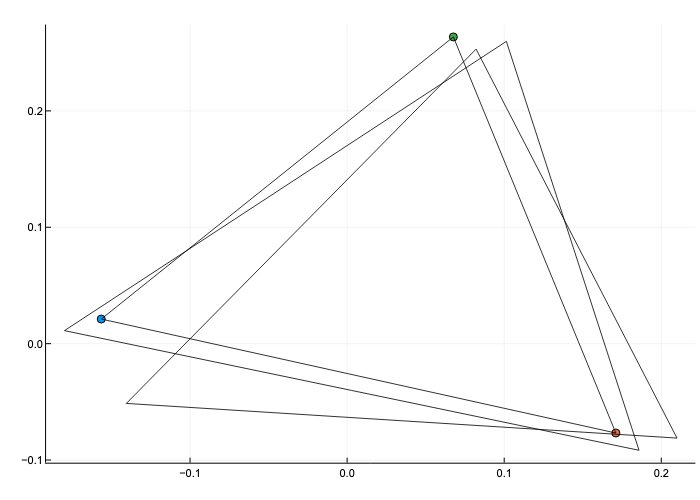

In [228]:
plot(); plot_trajectories(r.picks[:,prob])
plot_triangles!(r.picks[:, neighs], color=:black, alpha=0.8, legend=false)

In [33]:
evals, evecs = eigs(r.Q, which=:LR, nev=6, check=0, maxiter=1000, tol=0)
evecs = real.(evecs)
evals

LoadError: 

┌ Error: XYAUPD_Exception: Could not build an Arnoldi factorization.
│ IPARAM(5) returns the size of the current Arnoldi factorization.
│ The user is advised to check that enough workspace and array storage has been allocated.
│   info = -9999
└ @ Arpack /Users/alex/.julia/packages/Arpack/S16ni/src/libarpack.jl:47


In [34]:
evecs

300×6 Matrix{ComplexF64}:
 0.057735+0.0im   -0.0289851+0.0im  -0.00815373+0.0im  …   0.00134275+0.0im
 0.057735+0.0im    0.0301954+0.0im   -0.0177396+0.0im     -0.00433432+0.0im
 0.057735+0.0im     0.136266+0.0im    0.0171077+0.0im       0.0118158+0.0im
 0.057735+0.0im   -0.0250423+0.0im    0.0204757+0.0im       0.0446998+0.0im
 0.057735+0.0im   -0.0552041+0.0im    0.0206688+0.0im      -0.0585446+0.0im
 0.057735+0.0im   -0.0296208+0.0im   0.00876013+0.0im  …   -0.0873962+0.0im
 0.057735+0.0im  -0.00317654+0.0im    0.0269006+0.0im      0.00784132+0.0im
 0.057735+0.0im   -0.0527013+0.0im  -0.00398887+0.0im       0.0189694+0.0im
 0.057735+0.0im    0.0260106+0.0im   -0.0313205+0.0im     -0.00647157+0.0im
 0.057735+0.0im    0.0386745+0.0im    0.0194402+0.0im        0.040978+0.0im
 0.057735+0.0im   -0.0379491+0.0im   -0.0134859+0.0im  …    0.0374268+0.0im
 0.057735+0.0im    0.0144936+0.0im     0.172588+0.0im      -0.0892796+0.0im
 0.057735+0.0im   -0.0495575+0.0im    0.0708973+0.0im      -0.

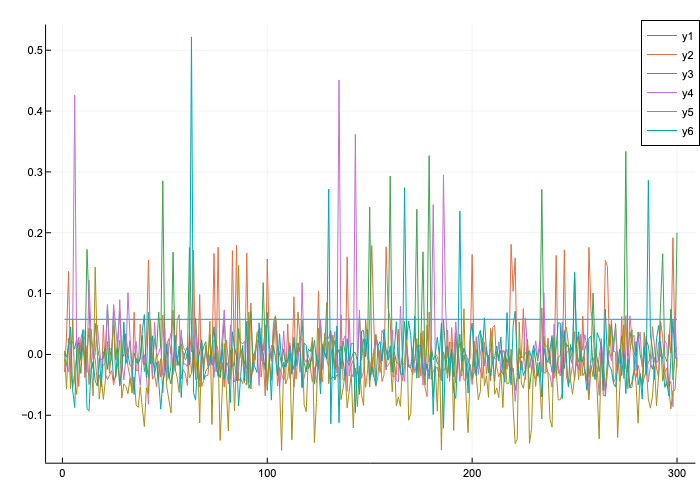

In [35]:
plot(real.(evecs))

In [36]:
step=100
for evec in 1:length(evals)

    col = real.(evecs[:,evec])[1:step:end]
    data = center[:,1:step:end]
    plot();
    plot_trajectories(normalform(data), alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display

    scatter(data[1,:], data[2,:], alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display
end

LoadError: MethodError: no method matching axes(::typeof(center), ::Int64)
[0mClosest candidates are:
[0m  axes([91m::RecipesPipeline.Volume[39m, ::Any...) at /Users/alex/.julia/packages/RecipesPipeline/CirY4/src/utils.jl:108
[0m  axes([91m::Base.Broadcast.Broadcasted{var"#s832", var"#s831", F, Args} where {var"#s832", var"#s831"<:(Tuple{Vararg{T, N}} where T), F, Args<:Tuple}[39m, ::Integer) where N at broadcast.jl:212
[0m  axes([91m::Surface[39m, ::Any...) at /Users/alex/.julia/packages/RecipesPipeline/CirY4/src/utils.jl:82
[0m  ...